# K-Means Clustering

Dataset: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# Imports

### Libraries

In [167]:
import sys
import os
sys.path.append(os.path.abspath(".."))

# import importlib
# import tools.functions
# importlib.reload(tools.functions)

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from algorithms.kmeans_clustering import KMeans

### Dataset

In [169]:
df = pd.read_csv('../data/Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing

In [170]:
X = df.iloc[:, [3,4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

# K-Means Clustering

### Performing Elbow Method to obtain optimal number of clusters

In [171]:
wcss = []

for k in range(1,11):
    best_wcss = float('inf')
    for _ in range(10):
        model = KMeans(n_clusters=k)
        wcss_error = model.fit(X)
        best_wcss = min(best_wcss, wcss_error)
    wcss.append(best_wcss)
wcss

[np.float64(270052.0),
 np.float64(181420.0),
 np.float64(106463.0),
 np.float64(73758.0),
 np.float64(44537.0),
 np.float64(37361.0),
 np.float64(31883.0),
 np.float64(25207.0),
 np.float64(22998.0),
 np.float64(19882.0)]

### Plotting the WCSS to visually obtain the optimal number of clusters (elbow point)

Text(0.5, 1.0, 'WCSS v/s Number of Clusters')

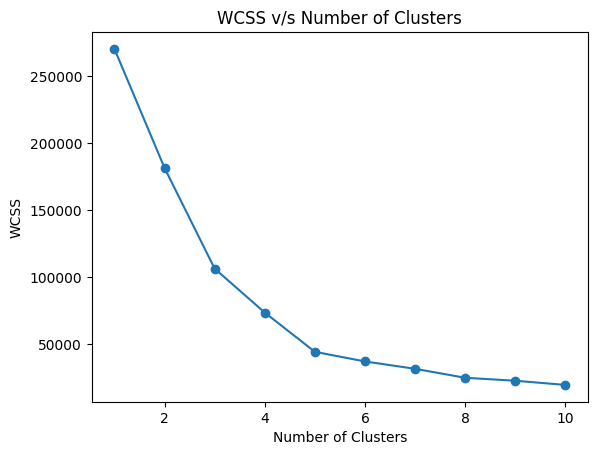

In [172]:
plt.plot(np.arange(10)+1,wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS v/s Number of Clusters')

### Creating Final Clustering Model

In [173]:
models = []
inertia = []


for i in range(10):
    model = KMeans(n_clusters=5)
    models.append(model)
    inertia.append(model.fit(X))

final_model = models[np.argmin(inertia)]

# Visualization of the clustering result

[]

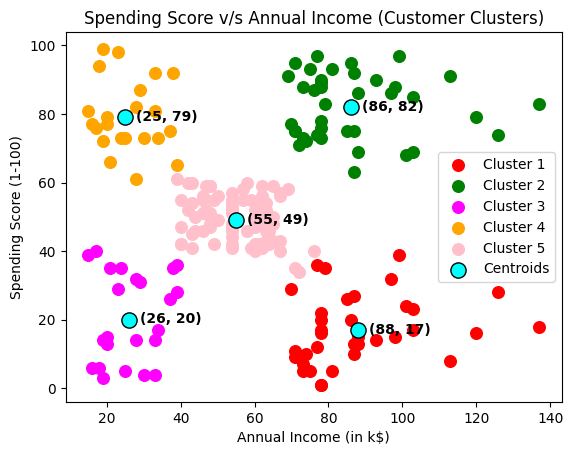

In [174]:
plt.scatter(X[final_model._labels == 0, 0], X[final_model._labels == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[final_model._labels == 1, 0], X[final_model._labels == 1, 1], s = 70, c = 'green', label = 'Cluster 2')
plt.scatter(X[final_model._labels == 2, 0], X[final_model._labels == 2, 1], s = 70, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[final_model._labels == 3, 0], X[final_model._labels == 3, 1], s = 70, c = 'orange', label = 'Cluster 4')
plt.scatter(X[final_model._labels == 4, 0], X[final_model._labels == 4, 1], s = 70, c = 'pink', label = 'Cluster 5')

plt.scatter(final_model.centroids[:, 0], final_model.centroids[:, 1], s = 120, c = 'cyan', edgecolors='black', label = 'Centroids')

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score v/s Annual Income (Customer Clusters)')
plt.legend()
for i in range(5):
    plt.text(final_model.centroids[:, 0][i]+3, final_model.centroids[:, 1][i] - 1, f'({final_model.centroids[:, 0][i].astype(int)}, {final_model.centroids[:, 1][i].astype(int)})', fontweight='heavy')
plt.plot()